In [ ]:
import pandas as pd


# Загрузка исходного датасета
df = pd.read_csv("countries.csv", sep=";", encoding="utf-8")

# Оставляем только нужные столбцы
columns_needed = ["name", "area", "population", "continent", "currency_name"]
df = df[columns_needed]

# Преобразуем типы данных
# Площадь и население должны быть числами
df["area"] = pd.to_numeric(df["area"], errors="coerce")        # некорректные значения превратятся в NaN
df["population"] = pd.to_numeric(df["population"], errors="coerce")

# Континент, валюта и название страны — строки
df["continent"] = df["continent"].astype(str)
df["currency_name"] = df["currency_name"].astype(str)
df["name"] = df["name"].astype(str)

# Проверка и очистка данных
# Убираем строки с пустыми критически важными данными
df = df.dropna(subset=["area", "population", "continent", "currency_name", "name"])

# Сброс индекса после удаления строк
df = df.reset_index(drop=True)

# Сохранение подготовленного датасета
df.to_csv("countries_clean.csv", index=False, sep=";", encoding="utf-8")

# Выводим первые строки
df.head()


,name,area,population,continent,currency_name
0,Andorra,468.0,84000,EU,Euro
1,United Arab Emirates,82880.0,4975593,AS,Dirham
2,Afghanistan,647500.0,29121286,AS,Afghani
3,Albania,28748.0,2986952,EU,Lek
4,Armenia,29800.0,2968000,AS,Dram


Гипотеза 1: Чем больше площадь страны, тем больше ее население.

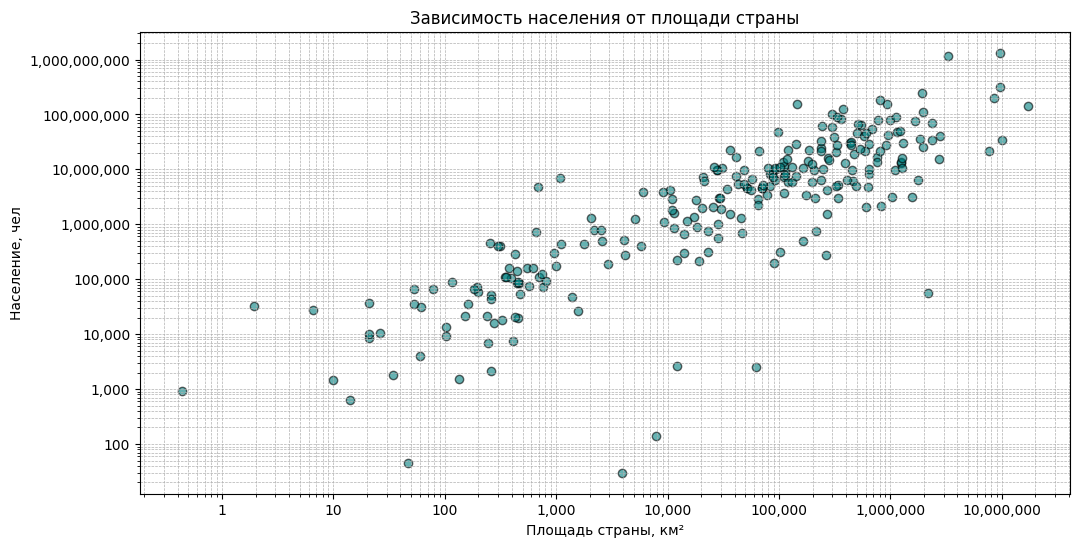

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Убираем страны с нулевой площадью или населением
df_plot = df[(df["area"] > 0) & (df["population"] > 0)]

plt.figure(figsize=(12, 6))
plt.scatter(df_plot["area"], df_plot["population"], alpha=0.6, color="teal", edgecolor="k")

plt.xscale("log")  # логарифмическая шкала по площади
plt.yscale("log")  # логарифмическая шкала по населению

plt.xlabel("Площадь страны, км²")
plt.ylabel("Население, чел")
plt.title("Зависимость населения от площади страны")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Форматирование делений осей с разделителем тысяч
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{int(y):,}"))

plt.show()


In [13]:
# Убираем нулевые значения, чтобы не было деления на ноль
df_clean = df[(df["area"] > 0) & (df["population"] > 0)]

# Вычисляем коэффициент корреляции Пирсона
correlation = df_clean["area"].corr(df_clean["population"])
print(f"Коэффициент корреляции между площадью и населением: {correlation:.2f}")


Коэффициент корреляции между площадью и населением: 0.47


Кэффициент корреляции положителен, почти равен 0.5, следовательно, гипотеза подтверждена

Гипотеза 2: Валюту "Евро" используют только европейские страны.

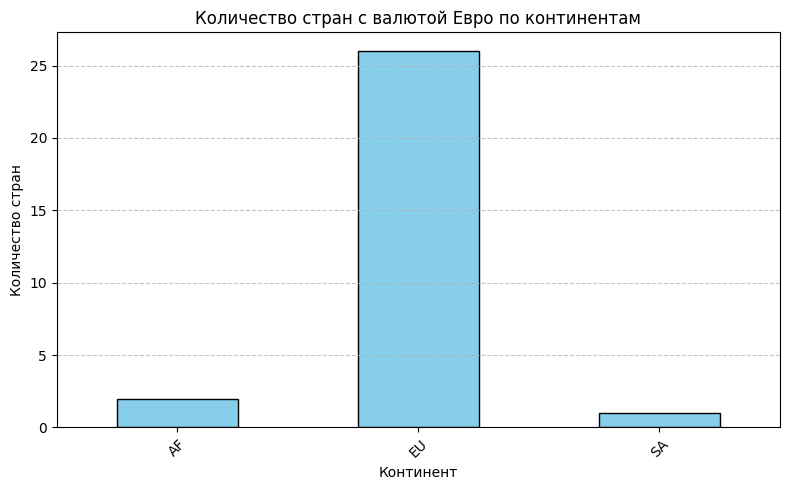

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем подготовленный датасет
df = pd.read_csv("countries_clean.csv", sep=";", encoding="utf-8")

# Фильтруем только страны с валютой Euro и с известным континентом
euro_df = df[(df["currency_name"] == "Euro") & (df["continent"].notna())]

# Группируем по континенту
continent_counts = euro_df.groupby("continent").size()

# Построение графика
plt.figure(figsize=(8, 5))
continent_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Количество стран с валютой Евро по континентам")
plt.xlabel("Континент")
plt.ylabel("Количество стран")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

# Загрузка подготовленного датасета
df = pd.read_csv("countries_clean.csv", sep=";", encoding="utf-8")

# Фильтруем страны с валютой Euro и исключаем пустые значения континента
euro_df = df[(df["currency_name"] == "Euro") & (df["continent"].notna()) & (df["continent"] != "")]

# Проверяем, есть ли страны с евро вне Европы
non_europe = euro_df[euro_df["continent"] != "EU"]

if len(non_europe) == 0:
    print("Гипотеза подтверждается: евро используют только европейские страны.")
else:
    print("Гипотеза не подтверждается: евро используется и в других континентах.")
    print(non_europe[["name", "continent", "currency_name"]])


Гипотеза не подтверждается: евро используется и в других континентах.
              name continent currency_name
62   French Guiana        SA          Euro
154        Reunion        AF          Euro
204        Mayotte        AF          Euro
